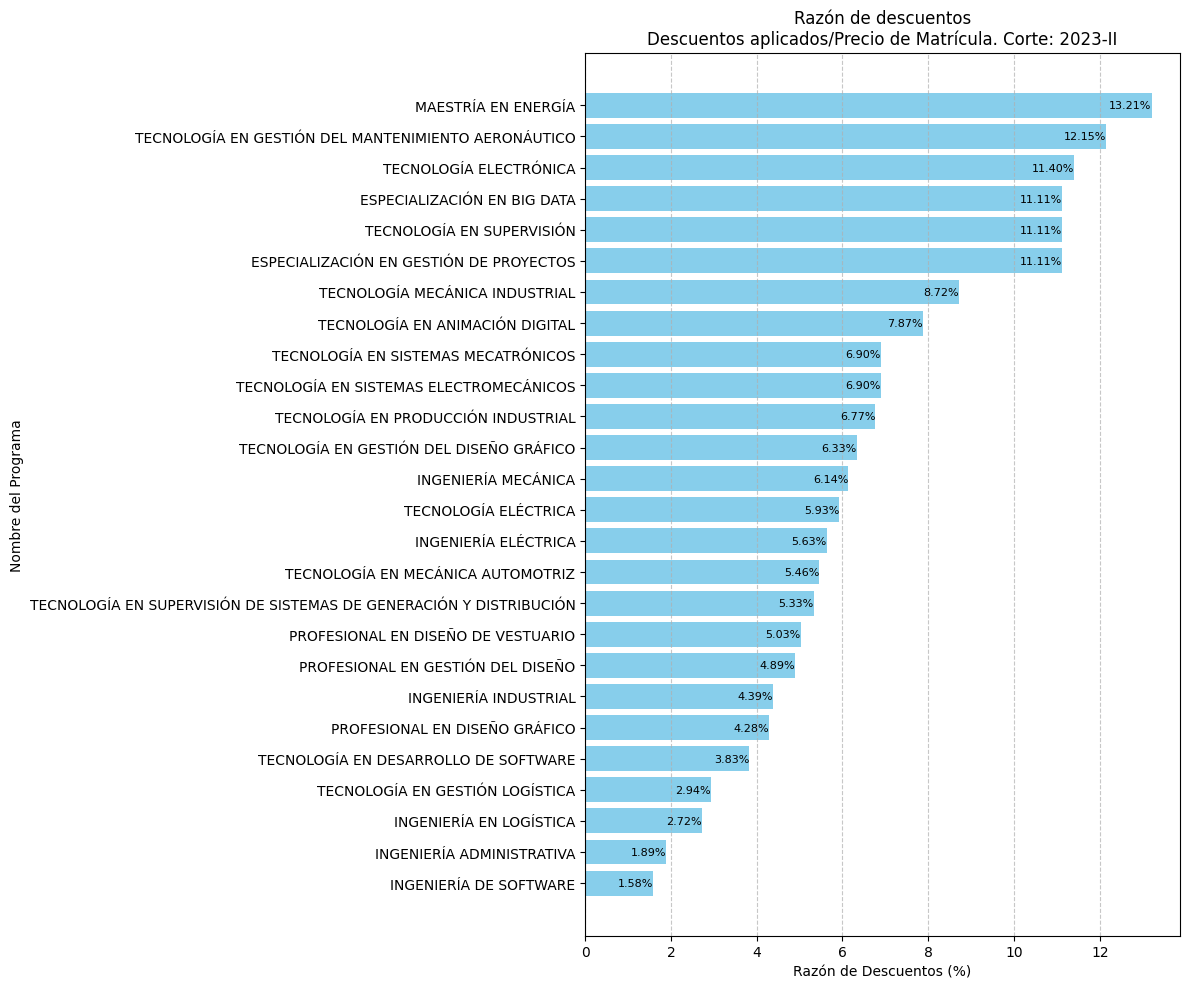

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Crear un DataFrame con los datos proporcionados
data = {
    'NOMBRE_OBJETO': [
        'TECNOLOGÍA EN MECÁNICA AUTOMOTRIZ', 'TECNOLOGÍA EN PRODUCCIÓN INDUSTRIAL', 'TECNOLOGÍA EN DESARROLLO DE SOFTWARE',
        'TECNOLOGÍA EN SISTEMAS MECATRÓNICOS', 'TECNOLOGÍA MECÁNICA INDUSTRIAL', 'TECNOLOGÍA ELECTRÓNICA',
        'TECNOLOGÍA EN GESTIÓN DEL MANTENIMIENTO AERONÁUTICO', 'TECNOLOGÍA EN SISTEMAS ELECTROMECÁNICOS',
        'TECNOLOGÍA ELÉCTRICA', 'TECNOLOGÍA EN GESTIÓN DEL DISEÑO GRÁFICO', 'TECNOLOGÍA EN ANIMACIÓN DIGITAL',
        'TECNOLOGÍA EN SUPERVISIÓN DE SISTEMAS DE GENERACIÓN Y DISTRIBUCIÓN', 'INGENIERÍA MECÁNICA',
        'PROFESIONAL EN DISEÑO GRÁFICO', 'INGENIERÍA ELÉCTRICA', 'PROFESIONAL EN DISEÑO DE VESTUARIO',
        'ESPECIALIZACIÓN EN GESTIÓN DE PROYECTOS', 'PROFESIONAL EN GESTIÓN DEL DISEÑO', 'INGENIERÍA ADMINISTRATIVA',
        'INGENIERÍA DE SOFTWARE', 'INGENIERÍA EN LOGÍSTICA', 'INGENIERÍA INDUSTRIAL', 'TECNOLOGÍA EN GESTIÓN LOGÍSTICA',
        'TECNOLOGÍA EN SUPERVISIÓN', 'MAESTRÍA EN ENERGÍA', 'ESPECIALIZACIÓN EN BIG DATA'
    ],
    'razon_dctos_por_estudiante': [
        '5,46%', '6,77%', '3,83%', '6,90%', '8,72%', '11,40%', '12,15%', '6,90%', '5,93%', '6,33%',
        '7,87%', '5,33%', '6,14%', '4,28%', '5,63%', '5,03%', '11,11%', '4,89%', '1,89%', '1,58%',
        '2,72%', '4,39%', '2,94%', '11,11%', '13,21%', '11,11%'
    ]
}

# Convertir porcentajes a valores numéricos
data['razon_dctos_por_estudiante'] = [float(value.replace(',', '.').replace('%', '')) for value in data['razon_dctos_por_estudiante']]

# Crear DataFrame
df = pd.DataFrame(data)

# Asegurar que los nombres de los programas sean únicos solo si están duplicados
df['NOMBRE_OBJETO'] = df['NOMBRE_OBJETO'].apply(lambda x: x.strip())
df['NOMBRE_OBJETO'] = df['NOMBRE_OBJETO'].apply(lambda x: f"{x} ({df['NOMBRE_OBJETO'].tolist().count(x)})" if df['NOMBRE_OBJETO'].tolist().count(x) > 1 else x)

# Ordenar los datos por la razón de descuentos
df = df.sort_values(by='razon_dctos_por_estudiante')

# Crear la gráfica de barras horizontales
plt.figure(figsize=(12, 10))
bars = plt.barh(df['NOMBRE_OBJETO'], df['razon_dctos_por_estudiante'], color='skyblue')

# Añadir etiquetas a las barras
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}%',
        va='center',
        ha='left' if bar.get_width() < 0 else 'right',
        color='black',
        fontsize=8
    )

# Ajustes de la gráfica
plt.xlabel('Razón de Descuentos (%)')
plt.ylabel('Nombre del Programa')
plt.title('Razón de descuentos\nDescuentos aplicados/Precio de Matrícula. Corte: 2023-II')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar la gráfica
plt.savefig('razon_de_descuentos_2023_II.png', dpi=300)

# Mostrar la gráfica
plt.show()

from google.colab import files
files.download('/content/razon_de_descuentos_2023_II.png')